<h1 align=center>Sales Prediction</h1>

## Intorduction
In this notebook, we performed sales prediction based on advertising expenditure features such as TV, newspaper, and radio.

## Performance
We evaluated the performance of our models using the following metrics:
* R-squared (R2) score: A measure of how well the model captures the variance in the target variable (sales).
* Mean Squared Error (MSE): A measure of the average squared difference between predicted and actual sales values.
* Cross-Validation Score: To ensure the model's generalization ability and minimize overfitting.

## Models
We trained various models, including linear regression, Lasso, and Ridge regression. Finally, we tested our models on new data to assess their real-world predictive performance.

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')        

# Importing Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/neerajprasad209/Dataset/main/Advertising.csv")

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df = df.drop(columns="Unnamed: 0", axis=1)

In [7]:
df.shape

(200, 4)

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


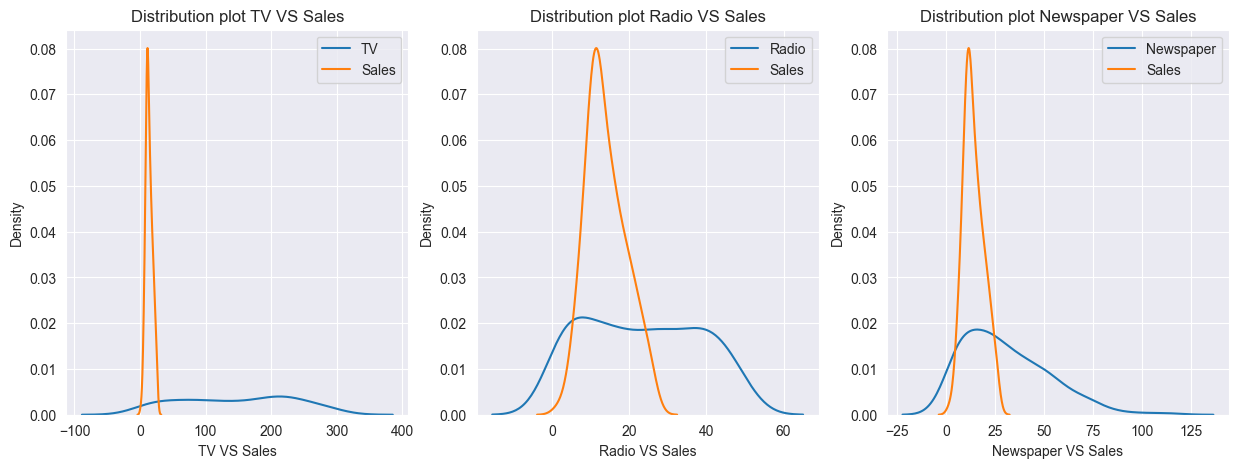

In [12]:
sns.set_style("darkgrid")

plt.figure(figsize=(15,5))

columns = {0:"TV", 1:"Radio", 2:"Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1,3, plot+1)
    sns.distplot(x=df[col_name], hist=False, label=col_name)
    sns.distplot(x=df["Sales"],hist=False,label="Sales")
    
    plt.xlabel(f"{col_name} VS Sales")
    plt.title(f"Distribution plot {col_name} VS Sales")
    plt.legend()
plt.show()

In [13]:
corr = df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


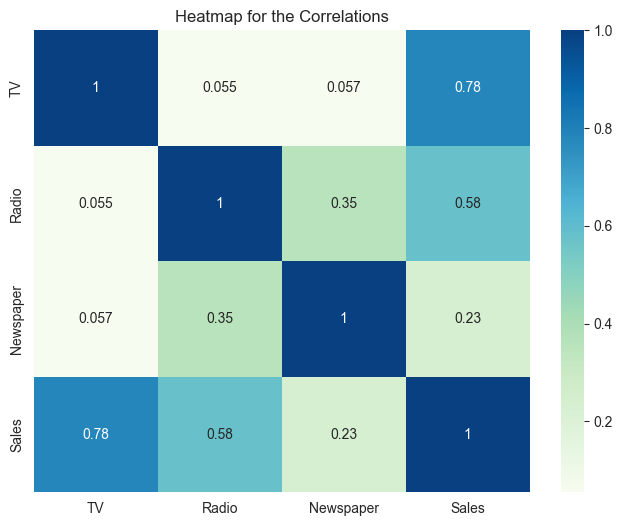

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap="GnBu")
plt.title("Heatmap for the Correlations")
plt.show()

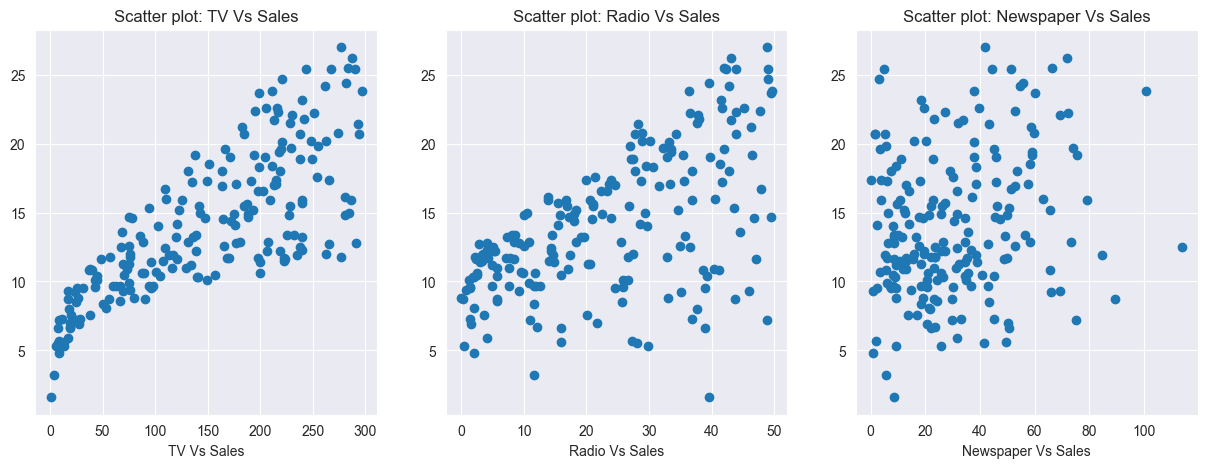

In [15]:
plt.figure(figsize=(15,5))

columns = {0:"TV", 1:"Radio", 2:"Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1,3, plot+1)
    plt.scatter(x=df[col_name], y=df["Sales"], label= col_name)
    
    plt.xlabel(f"{col_name} Vs Sales")
    plt.title(f"Scatter plot: {col_name} Vs Sales")
    
plt.show()

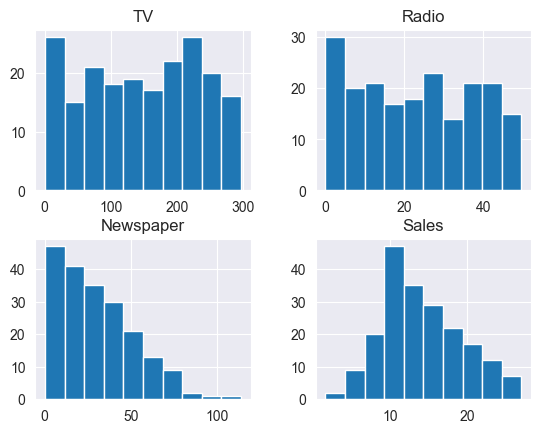

In [16]:
df.hist()
plt.show()

## Seperating the Dependent and Independent columns.

In [17]:
X = df.drop(columns='Sales',axis=1)
Y = df[['Sales']]

In [18]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [20]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
le = LabelEncoder()
Y = le.fit_transform(Y)

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [22]:
scaler = MinMaxScaler()
scaler.fit(xtrain,ytrain)

MinMaxScaler()

In [23]:
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Model Traning

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [33]:
for name, model in models:
    model.fit(xtrain_scaled,ytrain)
    ypred = model.predict(xtest_scaled)
    
    mse = mean_squared_error(ytest,ypred)
    r2 = r2_score(ytest,ypred)
    
    cv_score = cross_val_score(model, xtrain_scaled, ytrain, cv=5, scoring='r2')
    
    print(f"{name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    print(f"Cross Validation Score: {cv_score.mean()}")
    print("\n===================================================================\n")

Linear Regression
Mean Squared Error: 108.8856394172908
R2 Score: 0.9137298616704539
Cross Validation Score: 0.8829076766313095


Ridge Regression
Mean Squared Error: 124.1655747427147
R2 Score: 0.9016235624261707
Cross Validation Score: 0.8744917309227282


Lasso Regression
Mean Squared Error: 152.65126991931305
R2 Score: 0.8790543340462877
Cross Validation Score: 0.8556271875371658


